This is a demo of coarsening code from the preprint: [Graph reduction with spectral and cut guarantees](https://arxiv.org/abs/1808.10650). The final version of the paper will appear at JMLR.

Depedencies: pygsp, matplotlib, numpy, scipy, networkx, sortedcontainers

This work was kindly supported by the Swiss National Science Foundation (grant number PZ00P2 179981).

15 March 2019

[Andreas Loukas](https://andreasloukas.wordpress.com)

Released under the MIT license 

In [3]:
from libraries.coarsening_utils import *
import libraries.graph_utils

import numpy as np
import scipy as sp

import matplotlib
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import networkx as nx
import pygsp as gsp
from pygsp import graphs

### Construct the graph ## 


In [4]:
def read_graph(file):
    G = nx.Graph()

    with open(file, "r") as f:
        for line in f.readlines():
            if line.startswith("#"):
                continue
            line = line.strip().split(" ")
            G.add_edge(int(line[0]), int(line[1]))

    return G

In [5]:
G = read_graph("KnowledgeBase.edges")

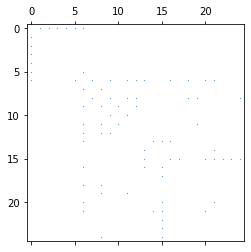

In [6]:
G = graphs.Graph(nx.adjacency_matrix(G))
    
N = G.N
L = G.L.toarray()
S = get_S(G).T

plt.spy(G.W, markersize=0.2);

### Do some coarsening

* Possible methods supported are: 'variation_edges', 'variation_neighborhood', 'algebraic_JC', 'heavy_edge', 'affinity_GS'
* $r = 1 - n/N$ is the dimensionality reduction ratio
* $k$ is the size of the subspace we are interested in
* $k_{max}$ should be set to be larger or equal to $k$. It allows us to measure the quality of coarsening over subspaces larger than $k$.

In [12]:
method = 'variation_neighborhood'  

# Parameters
r    = 0.6 # the extend of dimensionality reduction (r=0 means no reduction)
k    = 5  
kmax = int(3*k)
        
C, Gc, Call, Gall = coarsen(G, K=k, r=r, method=method) 
metrics = coarsening_quality(G, C, kmax=kmax)
n = Gc.N

v_in, v_out, weights = Gc.get_edge_list()

for u, v in zip(v_in, v_out):
    print(u, v)

print('{:16} | r: {:1.4}, nedges: {}, levels: {}, epsilon: {:1.4}'.format(method, metrics['r'], metrics['m'], len(Call), metrics['error_subspace'][k-1]))

1 0
2 0
3 0
4 0
5 0
5 4
6 5
7 5
7 6
8 5
9 5
9 6
9 8
variation_neighborhood | r: 0.6, nedges: 13, levels: 1, epsilon: 0.2326
